### Importing necessary libraries

### Step 1: Import necessary libraries
### Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
### Step 3: Creating a Linear Regression Model
### Step 4: Training the model using data set
### Step 5: Get the values of slope and intercept from the trained model
### Step 6: Display the equation of the line
### Step 7: Predit values using the model
### Step 8: Plot the regression line
### step 9: Prediction Features
 

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import statsmodels.api as sm

In [61]:
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [62]:
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [63]:
X.shape

(10, 1)

In [64]:
model = LinearRegression()

In [65]:
model.fit(X,Y)

LinearRegression()

In [73]:
m = model.coef_ #slope

In [74]:
c=model.intercept_ #y at above slope if x=0

In [71]:
X.shape

(10, 1)

In [72]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [82]:
y_predict = model.predict(X)

In [83]:
y_predict

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

In [84]:
Y

array([32.48357077, 34.30867849, 43.23844269, 52.61514928, 48.82923313,
       53.82931522, 67.89606408, 68.83717365, 67.65262807, 77.71280022])

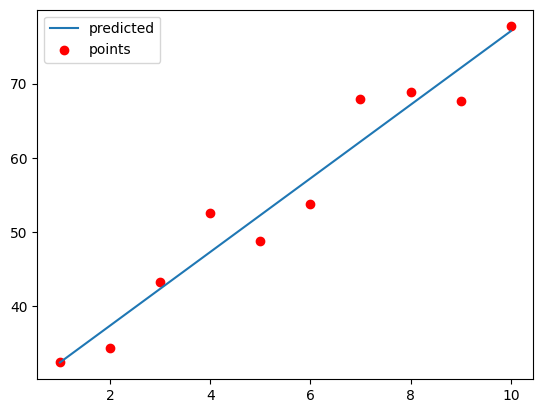

In [89]:
plt.plot(X,y_predict,label='predicted')
plt.scatter(X,Y,c='r',label='points')
plt.legend()

# Model Evaluation Metrics

In [104]:
mse = mean_squared_error(Y,y_predict)

In [105]:
mse

11.751853009895182

In [106]:
mae = mean_absolute_error(Y,y_predict)

In [107]:
mae

2.868273465573678

In [108]:
r2 = r2_score(Y,y_predict)

In [109]:
r2

0.9453822032109368

In [110]:
rmse = root_mean_squared_error(Y,y_predict)

In [111]:
rmse

3.428097578817613

In [114]:
n = len(Y)
p = 1
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [115]:
adj_r2

0.9385549786123039

In [118]:
while True:
    try:
        exp = float(input('Enter years of experience to predict salary (or -1 to exit): '))
        if exp==-1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f'predicted salary for {exp} years of experience: ${predicted_salary:.2f}k')
    except ValueError:
        print('Please Enter a value number')

Enter years of experience to predict salary (or -1 to exit):  5


predicted salary for 5.0 years of experience: $52.26k


Enter years of experience to predict salary (or -1 to exit):  2


predicted salary for 2.0 years of experience: $37.36k


Enter years of experience to predict salary (or -1 to exit):  -1


### Polynomaial Features

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
pf = PolynomialFeatures(degree=2)

In [125]:
X_poly = pf.fit_transform(X)

In [126]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [129]:
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:21:27   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\bandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)
